# Project: Capital Bike

In [1]:
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

%matplotlib inline

## Get Data

In [2]:
year19 = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

In [3]:
df_years = pd.DataFrame()
for year in year19: 
    df_year = pd.read_csv(f"data/2019{year}.csv", parse_dates=True)
    df_years  = df_years.append(df_year)

In [4]:
df_locations = pd.read_csv("data/Capital_Bike_Share_Locations.csv")

In [5]:
df_loc = df_locations[["ADDRESS", "TERMINAL_NUMBER", "LATITUDE", "LONGITUDE"]].copy()

In [ ]:
##df_loc.to_csv("data/df_loc.csv")

In [6]:
## weather data
df_weather = pd.read_csv("data/weather.csv")

## EDA & Feature Engineering

- instant: Record index<br>
- dteday: Date<br>
- season: Season (1:springer, 2:summer, 3:fall, 4:winter)<br>
- yr: Year (0: 2011, 1:2012)<br>
- mnth: Month (1 to 12)<br>
- hr: Hour (0 to 23)<br>
- holiday: wether day is holiday or not (extracted from Holiday Schedule)<br>
- weekday: Day of the week<br>
- workingday: If day is neither weekend nor holiday is 1, otherwise is 0.<br>
- weathersit: (extracted from Freemeteo)
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
- temp: Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)<br>
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)<br>
- hum: Normalized humidity. The values are divided to 100 (max)<br>
- windspeed: Normalized wind speed. The values are divided to 67 (max)<br>
- casual: count of casual users<br>
- registered: count of registered users<br>
- cnt: count of total rental bikes including both casual and registered

In [29]:
df.isnull().sum()  #-> missing data only for "bike-number"

Duration                 0
Start date               0
End date                 0
Start station number     0
Start station            0
End station number       0
End station              0
Bike number             14
Member type              0
month                    0
day                      0
hour                     0
dtype: int64

In [7]:
df = df_years

In [8]:
df["Start date"] = pd.to_datetime(df["Start date"])

In [184]:
##df.to_csv("data/df_main.csv")

### Map

In [9]:
df["month"] = df["Start date"].apply(lambda x: x.month)

In [10]:
df["day"] = df["Start date"].apply(lambda x: x.date())

In [11]:
df["hour"] = df["Start date"].apply(lambda x: x.hour)

In [130]:
#mapbox_access_token = "pk.eyJ1Ijoia2VzaSIsImEiOiJja2IxemUwdzkwNnZnMnhtYXZ5dnE2NHBtIn0.d5Xf1lZV009l1ubMrOAieQ"

In [169]:
#def gen_map(month:int):
 #   fig = go.Figure(go.Scattermapbox(
  #                      lat= df_loc["LATITUDE"],
   #                     lon= df_loc["LONGITUDE"], 
    #                    mode="markers",
     #                   marker=go.scattermapbox.Marker(size=(df[df["month"]==month].groupby(["Start station number"]).count()["Duration"]/100)),
      #                  text=df_loc["TERMINAL_NUMBER"]))
   # fig.update_layout(
    #    autosize=True,
     #   hovermode="closest",
      #  mapbox=dict(
       #     accesstoken=mapbox_access_token,
        #    bearing=0,
         #   center=dict(
          #      lon=-77.05722,
           #     lat=38.91805),
      #      pitch=0,
       #     zoom=10),)
  #  fig.show()

In [240]:
#months_list=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [245]:
#def gen_plot_basic(df, day="avg", month=0):
 #   if day == "avg": 
  #      fig = go.Figure([go.Bar
   #                      (x=df["hour"].unique(),
    #                      y=df[df["month"]==month].groupby("hour").count()["day"],
     #                       #hovertext=df[df["month"]==month].groupby("hour").count()["day"]
      #                   )])
    #else: 
     #   date = pd.to_datetime(day)
      #  fig = go.Figure([go.Bar
       #                  (x=df["hour"].unique(), 
        #                  y=df[df["day"]== date].groupby("hour").count()["day"])])
    #fig.show()

## most used station

In [77]:
#df[df["month"]==12].groupby("Start station number").count()["Start station"].sort_values()[-1:].index[0]  #.iloc[0]

31623

In [72]:
#df_loc[df_loc["TERMINAL_NUMBER"] == no]["ADDRESS"].iloc[0]

'Columbus Circle / Union Station'

## from station to station

In [12]:
df_stations = df.groupby(["Start station", "End station"]).count()

In [198]:
df_stations.reset_index(inplace=True) 

,Start station,End station,Duration,Start date,End date,Start station number,End station number,Bike number,Member type,month,day,hour,weekday
0,10th & E St NW,10th & E St NW,291,291,291,291,291,291,291,291,291,291,291
1,10th & E St NW,10th & Florida Ave NW,9,9,9,9,9,9,9,9,9,9,9
2,10th & E St NW,10th & G St NW,51,51,51,51,51,51,51,51,51,51,51
3,10th & E St NW,10th & K St NW,154,154,154,154,154,154,154,154,154,154,154
4,10th & E St NW,10th & Monroe St NE,30,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90555,Yuma St & Tenley Circle NW,Wisconsin Ave & Ingomar St NW,25,25,25,25,25,25,25,25,25,25,25
90556,Yuma St & Tenley Circle NW,Wisconsin Ave & Newark St NW,146,146,146,146,146,146,146,146,146,146,146
90557,Yuma St & Tenley Circle NW,Wisconsin Ave & O St NW,16,16,16,16,16,16,16,16,16,16,16
90558,Yuma St & Tenley Circle NW,Woodley Park Metro / Calvert St & Connecticut ...,10,10,10,10,10,10,10,10,10,10,10


In [251]:
df_stations = df_stations[df_stations["Duration"]>2500]

In [253]:
df_stations[["Start station", "End station", "Duration"]].to_csv("data/df_stations.csv")

## Weekdays and Weekend

In [12]:
df['weekday'] = df["Start date"].apply(lambda x: x.weekday())

In [13]:
df["weekday"] = df["weekday"].map({0:"Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

In [21]:
#check:
df[df["day"] == pd.to_datetime("2019-4-2").date()]  #should be Tuesday

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,month,day,hour,weekday
8865,166,2019-04-02 00:00:14,2019-04-02 00:03:00,31203,14th & Rhode Island Ave NW,31267,17th St & Massachusetts Ave NW,W23371,Member,4,2019-04-02,0,Tuesday
8866,126,2019-04-02 00:00:49,2019-04-02 00:02:56,31203,14th & Rhode Island Ave NW,31267,17th St & Massachusetts Ave NW,W20734,Member,4,2019-04-02,0,Tuesday
8867,418,2019-04-02 00:02:43,2019-04-02 00:09:42,31203,14th & Rhode Island Ave NW,31266,11th & M St NW,W20108,Member,4,2019-04-02,0,Tuesday
8868,405,2019-04-02 00:03:20,2019-04-02 00:10:05,31227,13th St & New York Ave NW,31519,1st & O St NW,75663,Member,4,2019-04-02,0,Tuesday
8869,393,2019-04-02 00:03:37,2019-04-02 00:10:11,31308,39th & Veazey St NW,31320,American University East Campus,W21063,Casual,4,2019-04-02,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,3146,2019-04-02 23:58:40,2019-04-03 00:51:07,31401,14th St & Spring Rd NW,31603,1st & M St NE,W23455,Casual,4,2019-04-02,23,Tuesday
16756,694,2019-04-02 23:58:47,2019-04-03 00:10:22,31314,34th & Water St NW,31110,20th St & Florida Ave NW,W23219,Member,4,2019-04-02,23,Tuesday
16757,3132,2019-04-02 23:58:51,2019-04-03 00:51:03,31401,14th St & Spring Rd NW,31603,1st & M St NE,W00374,Casual,4,2019-04-02,23,Tuesday
16758,232,2019-04-02 23:59:01,2019-04-03 00:02:54,31089,Court House Metro / 15th St & N Uhle St,31029,N Veitch St & 20th St N,W00461,Member,4,2019-04-02,23,Tuesday


In [ ]:
# encode weekend yes/no

In [16]:
df

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,month,day,hour,weekday
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,Member,1,2019-01-01,0,Tuesday
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,Casual,1,2019-01-01,0,Tuesday
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,Casual,1,2019-01-01,0,Tuesday
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,Member,1,2019-01-01,0,Tuesday
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,Member,1,2019-01-01,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161873,130,2019-12-31 23:57:36,2019-12-31 23:59:46,31011,Crystal Dr & 23rd St S,31009,Crystal Dr & 27th St S,W21285,Member,12,2019-12-31,23,Tuesday
161874,664,2019-12-31 23:57:47,2020-01-01 00:08:51,31125,15th & W St NW,31281,8th & O St NW,W24197,Member,12,2019-12-31,23,Tuesday
161875,389,2019-12-31 23:59:37,2020-01-01 00:06:06,31047,Braddock Rd Metro,31085,Mount Vernon Ave & E Nelson Ave,W21281,Member,12,2019-12-31,23,Tuesday
161876,962,2019-12-31 23:59:38,2020-01-01 00:15:40,31236,37th & O St NW / Georgetown University,31214,17th & Corcoran St NW,W00534,Member,12,2019-12-31,23,Tuesday


In [14]:
df['weekend'] = (df[df["weekday"] == "Saturday"]) | (df[df["weekday"] == "Sunday"])

TypeError: unsupported operand type(s) for |: 'float' and 'bool'

In [ ]:
df.loc[(df["weekday"] == "Saturday") | (df["weekday"] == "Sunday"), "weekend"] = 1

In [ ]:
df["weekend"] = df["weekend"].fillna(0)

## Rush hour, night, day

In [78]:
df.groupby("hour").count().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

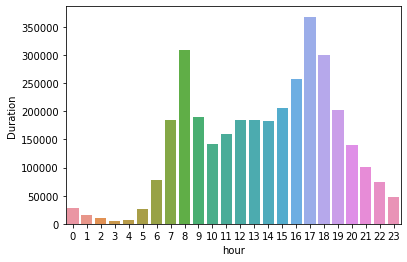

In [79]:
sns.barplot(df.groupby("hour").count().index, df.groupby("hour").count()["Duration"])

In [15]:
d = {0:'night', 1:'night', 2:'night', 3:'night', 4:'night', 5:'night', 6:'night', 7:'day', 8:'rush', 9:'day', 10:'day', 11:'day', 12:'day', 13:'day', 14:'day', 15:'day', 16:'day', 17:'rush', 18:'rush', 19:'day', 20:'day', 21:'day', 22:'night', 23:'night'}
df['hour_binned'] = df['hour'].map(d)

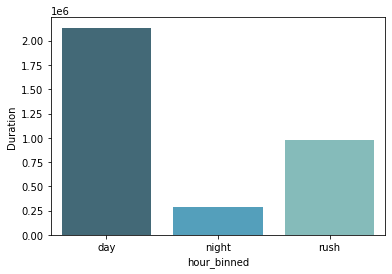

In [88]:
sns.barplot(df.groupby("hour_binned").count().index, df.groupby("hour_binned").count()["Duration"], palette="GnBu_d")

### For linegraph hour, weekday

In [16]:
df["date_by_hour"] = df["Start date"].apply(lambda x: x.replace(microsecond=0, second=0, minute=0))

In [161]:
df_count = df.groupby("date_by_hour").count().reset_index()

In [162]:
df_count["weekday"] = df_count["date_by_hour"].apply(lambda x: x.weekday())

In [163]:
df_count["weekday"] = df_count["weekday"].map({0:"Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

In [164]:
df_count["hour"] = df_count["date_by_hour"].apply(lambda x: x.hour)

In [169]:
df_count = df_count[["hour", "Duration", "weekday"]]

In [171]:
#df_count.to_csv("data/df_weekday.csv")

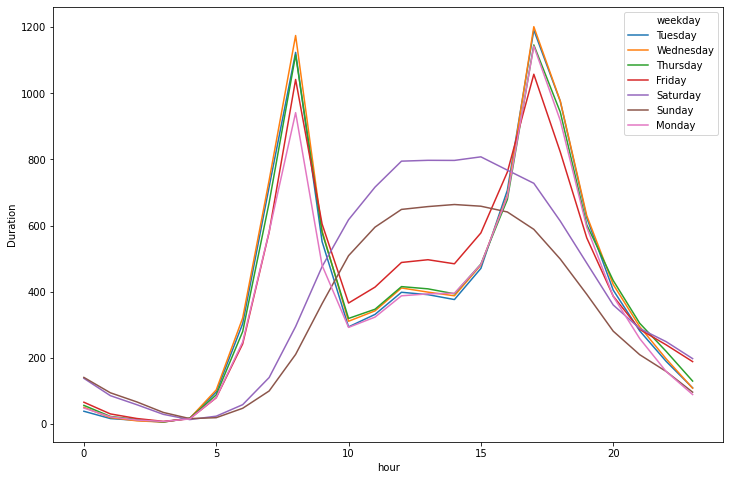

In [170]:
# hour of the day and weekday
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(df_count["hour"], df_count["Duration"], hue=df_count["weekday"], ci=None)

## weather

- PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
- SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
- SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)
- TAVG = Average Temperature in Fahrenheit
- AWND = Average daily wind speed (meters per second)
- WT** = Weather Type where ** has one of the following values: 
 01 = Fog, ice fog, or freezing fog (may include heavy fog)
 02 = Heavy fog or heaving freezing fog (not always
 distinguished from fog)
 03 = Thunder
 04 = Ice pellets, sleet, snow pellets, or small hail
 05 = Hail (may include small hail)
 06 = Glaze or rime
 08 = Smoke or haze
 09 = Blowing or drifting snow
 In Sum:  bad weather = fog, thunder, hail, glaze, rime, smoke, drifting snow

In [17]:
df_w = df_weather[df_weather["NAME"].str.match('WASHINGTON')]

In [18]:
df_wd = df_w.groupby("DATE").mean()

In [19]:
df_wd.drop(["WT11"], axis=1, inplace=True)

In [20]:
df_wt = df_wd.iloc[:,5:13].fillna(0)

In [21]:
df_wd["bad_weather"] = df_wt["WT01"]+df_wt["WT02"]+df_wt["WT03"]+df_wt["WT04"]+df_wt["WT05"]+df_wt["WT06"]+df_wt["WT08"]+df_wt["WT09"]


In [22]:
df_wd = df_wd[["AWND", "PRCP", "TAVG"]]

In [23]:
# convert Fahrenheit to celsius:
df_wd["TAVG"] = df_wd["TAVG"].apply(lambda x: round(((x-32)*(5/9)),2))

In [24]:
df_wd.reset_index(inplace=True) 

In [25]:
df_wd = df_wd.rename(columns={"DATE": "day"})

In [26]:
df_wd["day"] = df_wd["day"].apply(lambda x: pd.to_datetime(x).date())

In [185]:
#df_wd.to_csv("data/df_weather.csv")

In [186]:
#df_wd["weekday"] = df_wd["day"].apply(lambda x: x.weekday())

In [27]:
df_wd

,day,AWND,PRCP,TAVG
0,2019-01-01,12.415,0.000,12.50
1,2019-01-02,5.255,0.000,6.94
2,2019-01-03,5.815,0.000,7.50
3,2019-01-04,4.470,0.035,4.17
4,2019-01-05,9.060,0.075,8.33
...,...,...,...,...
360,2019-12-27,3.020,0.000,6.94
361,2019-12-28,2.685,0.000,9.17
362,2019-12-29,4.135,0.350,8.89
363,2019-12-30,6.265,0.520,11.94


In [28]:
df_plus = pd.merge(df, df_wd, how="left", on="day")

In [365]:
#fig = go.Figure(data=go.Scatter(
 #   x=df.groupby("day").mean().index,
  #  y=df.groupby("day").count()["Duration"]
   # ,
    #mode='markers',
   # marker=dict(
    #            color= df_plus.groupby("day").mean()["bad_weather"],  
     #           colorscale="matter",
      #          showscale=True,
       #             )#
#))

#fig.show()
#PRCP: colorscale = Darkmint
#TAVG: colorscale: BlueRed
# SNOW: colorscale = Magenta
# AWND : colorscale = Blugrn
# bad weather: colorscale: matter

In [29]:
df_plus.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,month,day,hour,weekday,hour_binned,date_by_hour,AWND,PRCP,TAVG
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,Member,1,2019-01-01,0,Tuesday,night,2019-01-01,12.415,0.0,12.5
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,Casual,1,2019-01-01,0,Tuesday,night,2019-01-01,12.415,0.0,12.5
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,Casual,1,2019-01-01,0,Tuesday,night,2019-01-01,12.415,0.0,12.5
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,Member,1,2019-01-01,0,Tuesday,night,2019-01-01,12.415,0.0,12.5
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,Member,1,2019-01-01,0,Tuesday,night,2019-01-01,12.415,0.0,12.5


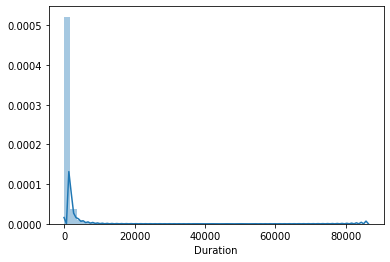

In [205]:
sns.distplot(df_plus["Duration"])

In [30]:
#df_plus.loc[df_plus["Duration"]<=120, "Duration_bins"] = "2 or less"

In [30]:
df_plus.loc[(df_plus["Duration"]<=300), "Duration_bins"] = "0 to5"
df_plus.loc[(df_plus["Duration"]<=600) & (df_plus["Duration"] > 300), "Duration_bins"] = "05 to10"
df_plus.loc[(df_plus["Duration"]<=900) & (df_plus["Duration"] > 600), "Duration_bins"] = "10 to 15"
df_plus.loc[(df_plus["Duration"]<=1800) & (df_plus["Duration"] > 900), "Duration_bins"] = "15 to 30"
df_plus.loc[(df_plus["Duration"]<=3600) & (df_plus["Duration"] > 1800), "Duration_bins"] = "30 to 60"
df_plus.loc[(df_plus["Duration"]<=5400) & (df_plus["Duration"] > 3600), "Duration_bins"] = "60 to 90"
df_plus.loc[df_plus["Duration"] > 5400, "Duration_bins"] = "90 or more"

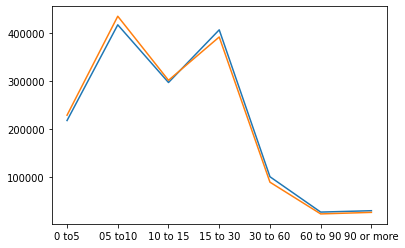

In [31]:
plt.plot(df_plus[df_plus["PRCP"]==0][:1500000].groupby("Duration_bins").count()["Duration"].index, df_plus[df_plus["PRCP"]==0][:1500000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["PRCP"]>0][:1500000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["PRCP"]>0)][:1500000].groupby("Duration_bins").count()["Duration"])

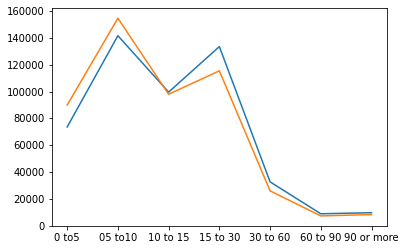

In [32]:
plt.plot(df_plus[df_plus["AWND"]<5][:500000].groupby("Duration_bins").count()["Duration"].index, df_plus[df_plus["AWND"]<5][:500000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["AWND"]>5][:500000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["AWND"]>5)][:500000].groupby("Duration_bins").count()["Duration"])

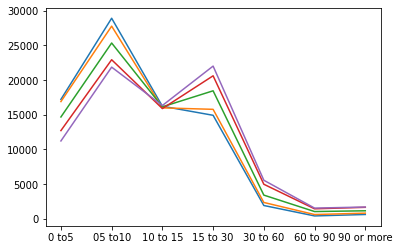

In [68]:
plt.plot(df_plus[df_plus["TAVG"]<0][:80000].groupby("Duration_bins").count()["Duration"].index, df_plus[df_plus["TAVG"]<0][:80000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["TAVG"]>0][:80000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["TAVG"]>0) & (df_plus["TAVG"]<5)][:80000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["TAVG"]>5][:80000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["TAVG"]>5) & (df_plus["TAVG"]<10)][:80000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["TAVG"]>10][:80000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["TAVG"]>10) & (df_plus["TAVG"]<20)][:80000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["TAVG"]>20][:80000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["TAVG"]>20)][:80000].groupby("Duration_bins").count()["Duration"])

In [73]:
df_plus.to_csv("data/df_main.csv")

In [74]:
df_plus

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,month,day,hour,weekday,hour_binned,date_by_hour,AWND,PRCP,TAVG,Duration_bins
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,E00141,Member,1,2019-01-01,0,Tuesday,night,2019-01-01 00:00:00,12.415,0.00,12.50,0 to5
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,W24067,Casual,1,2019-01-01,0,Tuesday,night,2019-01-01 00:00:00,12.415,0.00,12.50,15 to 30
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,W22654,Casual,1,2019-01-01,0,Tuesday,night,2019-01-01 00:00:00,12.415,0.00,12.50,0 to5
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,31281,8th & O St NW,31280,11th & S St NW,W22336,Member,1,2019-01-01,0,Tuesday,night,2019-01-01 00:00:00,12.415,0.00,12.50,0 to5
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,70004,Member,1,2019-01-01,0,Tuesday,night,2019-01-01 00:00:00,12.415,0.00,12.50,15 to 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398412,130,2019-12-31 23:57:36,2019-12-31 23:59:46,31011,Crystal Dr & 23rd St S,31009,Crystal Dr & 27th St S,W21285,Member,12,2019-12-31,23,Tuesday,night,2019-12-31 23:00:00,8.055,0.13,8.06,0 to5
3398413,664,2019-12-31 23:57:47,2020-01-01 00:08:51,31125,15th & W St NW,31281,8th & O St NW,W24197,Member,12,2019-12-31,23,Tuesday,night,2019-12-31 23:00:00,8.055,0.13,8.06,10 to 15
3398414,389,2019-12-31 23:59:37,2020-01-01 00:06:06,31047,Braddock Rd Metro,31085,Mount Vernon Ave & E Nelson Ave,W21281,Member,12,2019-12-31,23,Tuesday,night,2019-12-31 23:00:00,8.055,0.13,8.06,05 to10
3398415,962,2019-12-31 23:59:38,2020-01-01 00:15:40,31236,37th & O St NW / Georgetown University,31214,17th & Corcoran St NW,W00534,Member,12,2019-12-31,23,Tuesday,night,2019-12-31 23:00:00,8.055,0.13,8.06,15 to 30
